### facetgrid 用于展示数据的子集
* 1构造展示区域
* 2map函数

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

tips = pd.read_csv("tips.csv")
tips.head(100)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


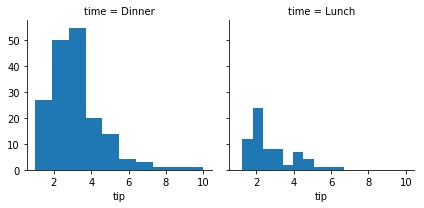

In [17]:
g = sns.FacetGrid(data=tips, col="time") # 绘图区域
g.map(plt.hist, "tip")  # 绘图

### 设置facegrid
* 绘图数据
* 行列内容
* 分类标签
* 长 宽

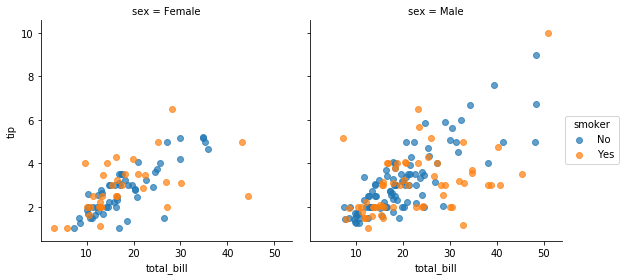

In [37]:
g = sns.FacetGrid(tips, col="sex", hue="smoker", size=4, aspect=1) # 指定行, 分类标签
g.map(plt.scatter, "total_bill", "tip", alpha=.7)  # 指定数据,
g.add_legend()

### 设置map 实际绘图内容
* 绘图方式
* 显示的行列内容
* 颜色
* 回归线是否显示
* 数据浮动宽度

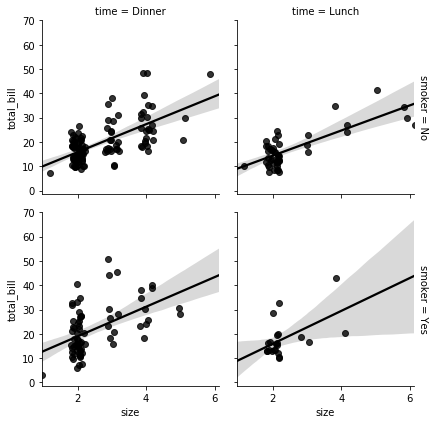

In [38]:

g = sns.FacetGrid(tips,row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color="black", fit_reg=True, x_jitter=.2)


## facegrid 绘制多变量


### 多变量指定不同的颜色
* 多变量设置数据源 分类显示标签 调色板不同的变量对应的颜色 显示尺寸


* 设置子图间隔

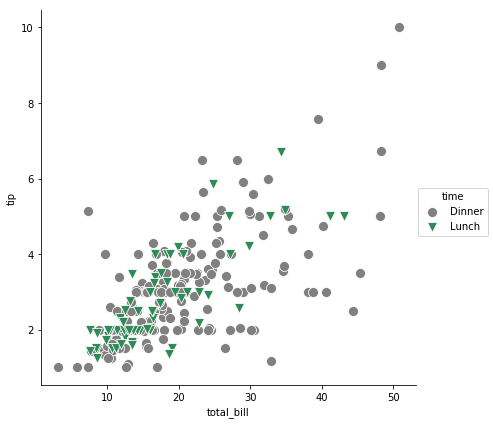

In [54]:
pal_color = dict(Lunch="seagreen", Dinner="gray") # 使用字典对属性中不同类别的值指定颜色

g = sns.FacetGrid(tips, hue="time", palette=pal_color, size=6, hue_kws={"marker":["o", "v"]}) 
# 指定            数据源, 分类标签, 调色板,             尺寸      不同标签形状

g.map(plt.scatter, "total_bill", "tip",s=100 ,   linewidth=.8, edgecolor="white")
#      散点图        行           列    点大小   线宽             边界颜色

g.add_legend()


### 子图绘制 with


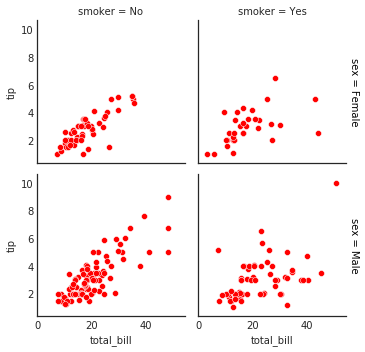

In [55]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, size=2.5)
g.map(plt.scatter, "total_bill", "tip", color="r", edgecolor="white", lw=.5)
